# Академия Аналитиков Авито

# Эконометрика

# Домашняя работа №3

## №1 (40 баллов)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('HW_003_001.txt')

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [5]:
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

y = df['Churn'].astype('int').values
X = df.drop('Churn', axis=1).values

- Ваше задание
    - Провести EDA анализ признаков, которые есть
    - Подумать над feature engineering, сформировать гипотезы
    - Зафиттить логистическую модель и пробит модель
    - Посмотреть на их метрики качества: псевдо $R^2$, confusion matrix, precision, recall, F1-score, ROC AUC
    - Какую модель вы бы выбрали?
    - Посмотреть на профиль среднего "клиента" (наблюдения). Какие переменные надо изменить, чтобы верояность ухода клиента снизилась?
    - Перейдем к предсказаниям:
        - У вас не всегда будут функции типа `LogisticRegressionCV`, поэтому почитайте про [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
        - Подумайте, какие еще признаки можно добавить в вашу модель. На этом этапе не бойтесь кол-ва признаков, чем больше, тем лучше. *{Дополнительно: почитайте про [`RFECV`](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py), попробуйте его применить}*
        - При наличии достаточного кол-ва наблюдений, хорошей стратегией является использование только части данных для расчета модели. Используя [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) выделите наблюдения для обучения.
        - Создайте стратифицированные фолды на обучающей выборке
        - На практике нам приходится выбирать между различными метриками качества. В этой задаче будем использовать ROC AUC
        - Используя `GridSearchCV` и [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression) подберите оптимальный гиперпараметр для l1, l2 регуляризаций. Помните, что вы хотите, чтобы оптимальный гиперпараметр был выбран согласно метрике ROC AUC. Почитайте, как это сделать в GridSearchCV
        - Нарисуйте графики, как меняется ваш score в зависимости от значения гиперпараметра

In [6]:
df.describe()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


array([[<Axes: title={'center': 'Account length'}>,
        <Axes: title={'center': 'Area code'}>,
        <Axes: title={'center': 'International plan'}>,
        <Axes: title={'center': 'Voice mail plan'}>],
       [<Axes: title={'center': 'Number vmail messages'}>,
        <Axes: title={'center': 'Total day minutes'}>,
        <Axes: title={'center': 'Total day calls'}>,
        <Axes: title={'center': 'Total day charge'}>],
       [<Axes: title={'center': 'Total eve minutes'}>,
        <Axes: title={'center': 'Total eve calls'}>,
        <Axes: title={'center': 'Total eve charge'}>,
        <Axes: title={'center': 'Total night minutes'}>],
       [<Axes: title={'center': 'Total night calls'}>,
        <Axes: title={'center': 'Total night charge'}>,
        <Axes: title={'center': 'Total intl minutes'}>,
        <Axes: title={'center': 'Total intl calls'}>],
       [<Axes: title={'center': 'Total intl charge'}>,
        <Axes: title={'center': 'Customer service calls'}>, <Axes: >,
  

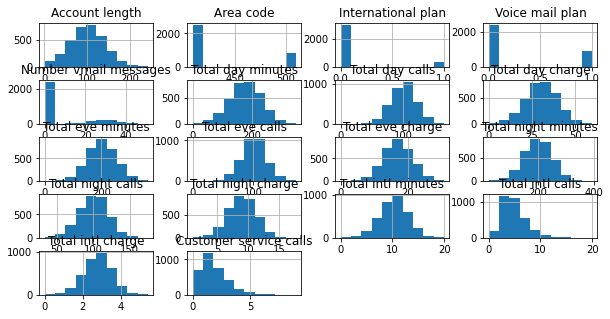

In [7]:
df.hist(figsize = (10, 5))

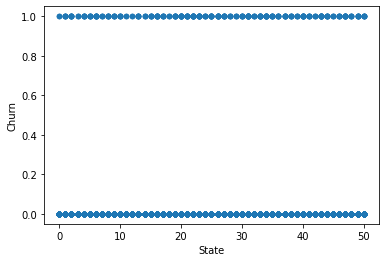

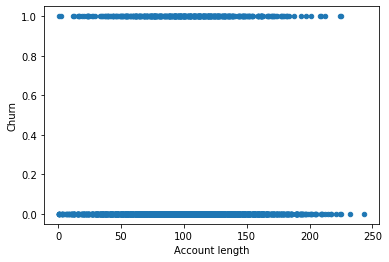

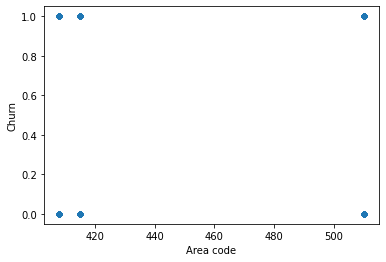

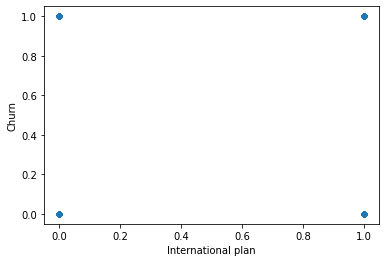

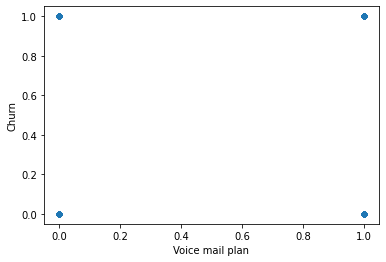

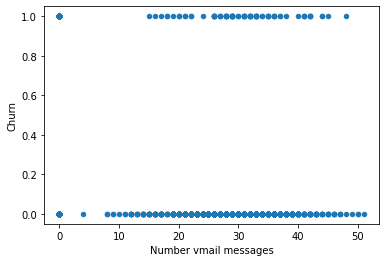

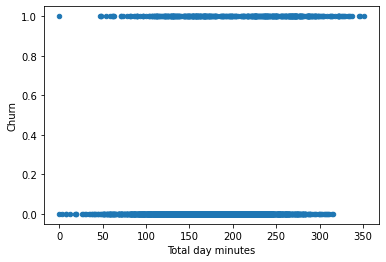

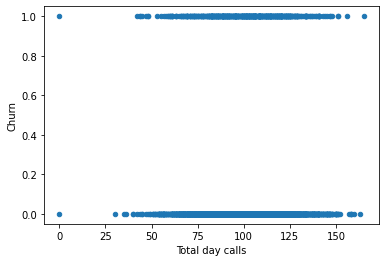

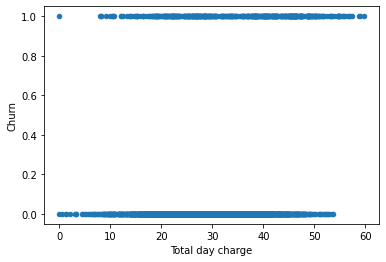

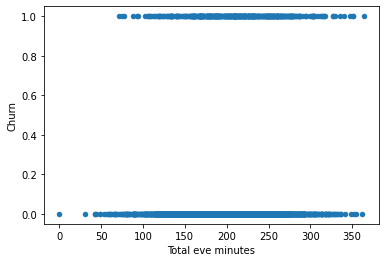

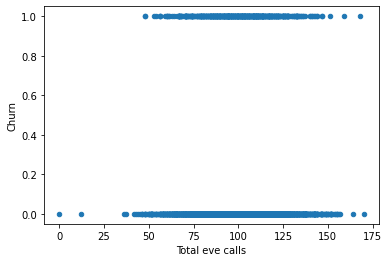

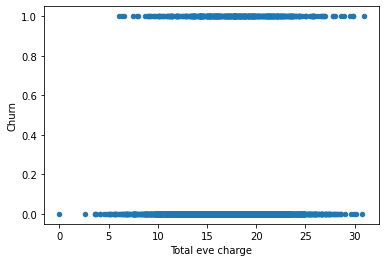

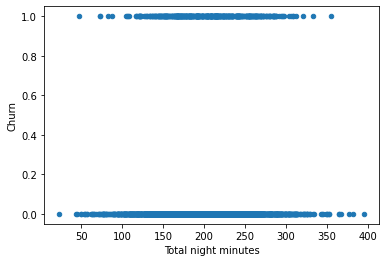

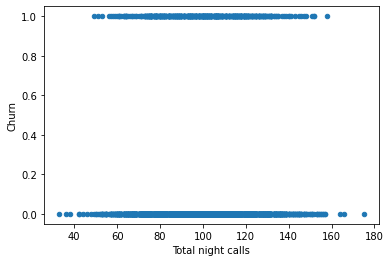

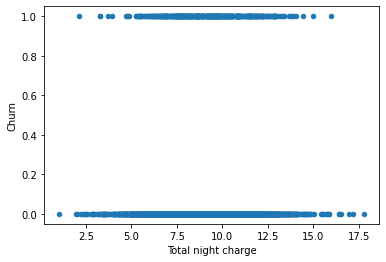

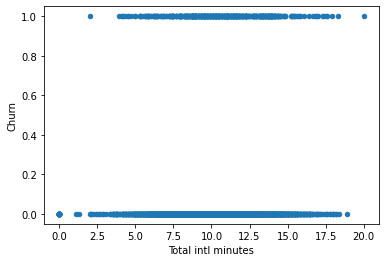

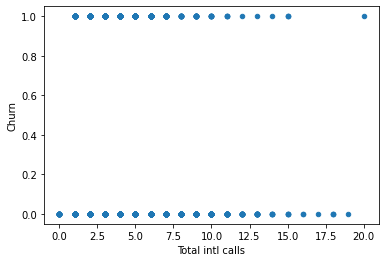

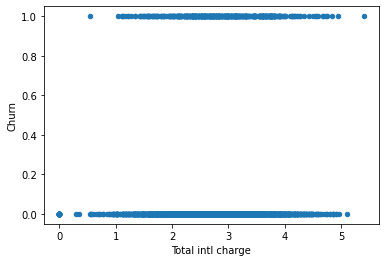

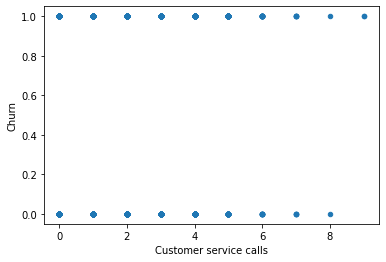

In [8]:
df = pd.read_csv('HW_003_001.txt')
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].astype('int').values
df['State'] = pd.Categorical(df['State'])
df['State'] = df['State'].cat.codes 
for i in df.columns:
    if i != 'Churn':
        df.plot.scatter(x = i, y = 'Churn')

In [9]:
import statsmodels.api as sm
import seaborn as sns

<Axes: >

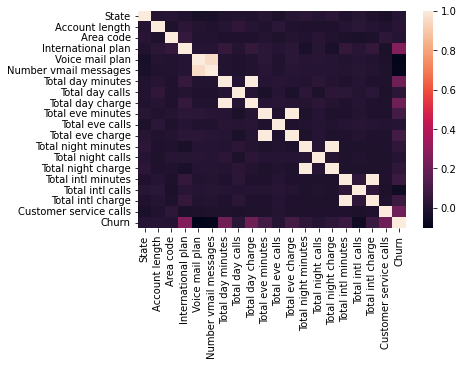

In [10]:
sns.heatmap(df.corr())

Видно, что Total <...> charge и total <...> minutes сильно коррелируют друг с другом. Возьмем `['International plan', 'Total day charge', 'Total eve charge', 'Total intl charge', 'Customer service calls']` в качестве начального пула признаков, посмотрим что будет 

In [11]:
list1 = ['International plan', 
         'Total day charge', 
         'Total eve charge', 
         'Total intl charge', 
         'Customer service calls', 
         ]

In [12]:
y = df['Churn']
X = df[list1]

In [13]:
logit_mod = sm.Logit(endog=y, exog=sm.add_constant(X)).fit()
logit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.335800
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3327
Method:                           MLE   Df Model:                            5
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.1885
Time:                        18:23:23   Log-Likelihood:                -1119.2
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                4.144e-110
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -7.5621      0.429    -17.615      0.000      -8.403      -6.721
International plan         1.9348      0.141     13.726      0.000       1.659       2.211
Total day charge           0.0740      0.006     11.821      0.000       0.062       0.086
Total eve charge           0.0765      0.013      5.825      0.000       0.051       0.102
Total intl charge          0.2958      0.075      3.966      0.000       0.150       0.442
Customer service calls     0.4989      0.038     12.976      0.000       0.424       0.574
==========================================================================================
"""

In [14]:
probit_mod = sm.Probit(endog=y, exog=sm.add_constant(X)).fit()
probit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.334574
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                         Probit   Df Residuals:                     3327
Method:                           MLE   Df Model:                            5
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.1914
Time:                        18:23:26   Log-Likelihood:                -1115.1
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                7.112e-112
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -4.1401      0.221    -18.727      0.000      -4.573      -3.707
International plan         1.1241      0.081     13.911      0.000       0.966       1.283
Total day charge           0.0396      0.003     12.232      0.000       0.033       0.046
Total eve charge           0.0407      0.007      5.750      0.000       0.027       0.055
Total intl charge          0.1491      0.041      3.673      0.000       0.070       0.229
Customer service calls     0.2842      0.021     13.732      0.000       0.244       0.325
==========================================================================================
"""

Все признаки получились значимыми, но Pseudo R-squered какой-то неудовлетворительный, постараемся его повысить 

Давайте предполагать, что какой-то еще признак нужен и если он покажет значимость, то мы его будем оставлять.

Я удалил те, которые не прошли проверку значимости, чтобы не загрмождать ноутбук.

In [15]:
list1 = ['International plan', 
         'Total day charge', 
         'Total eve charge', 
         'Total intl charge', 
         'Customer service calls', 
         'Total intl calls',
         ]
y = df['Churn']
X = df[list1]
logit_mod = sm.Logit(endog=y, exog=sm.add_constant(X)).fit()
logit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.333547
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3326
Method:                           MLE   Df Model:                            6
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.1939
Time:                        18:23:30   Log-Likelihood:                -1111.7
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                2.579e-112
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -7.2539      0.436    -16.655      0.000      -8.108      -6.400
International plan         1.9584      0.142     13.815      0.000       1.681       2.236
Total day charge           0.0748      0.006     11.895      0.000       0.062       0.087
Total eve charge           0.0773      0.013      5.874      0.000       0.052       0.103
Total intl charge          0.3105      0.075      4.158      0.000       0.164       0.457
Customer service calls     0.5003      0.039     12.983      0.000       0.425       0.576
Total intl calls          -0.0919      0.024     -3.755      0.000      -0.140      -0.044
==========================================================================================
"""

In [16]:
list1 = ['International plan', 
         'Total day charge', 
         'Total eve charge', 
         'Total intl charge', 
         'Customer service calls', 
         'Total intl calls',
         'Total night minutes',
         ]
y = df['Churn']
X = df[list1]
logit_mod = sm.Logit(endog=y, exog=sm.add_constant(X)).fit()
logit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.332002
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3325
Method:                           MLE   Df Model:                            7
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.1976
Time:                        18:23:31   Log-Likelihood:                -1106.6
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                1.549e-113
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -8.0379      0.506    -15.870      0.000      -9.031      -7.045
International plan         1.9877      0.143     13.936      0.000       1.708       2.267
Total day charge           0.0753      0.006     11.940      0.000       0.063       0.088
Total eve charge           0.0792      0.013      5.988      0.000       0.053       0.105
Total intl charge          0.3141      0.075      4.199      0.000       0.167       0.461
Customer service calls     0.5061      0.039     13.072      0.000       0.430       0.582
Total intl calls          -0.0924      0.025     -3.761      0.000      -0.141      -0.044
Total night minutes        0.0035      0.001      3.201      0.001       0.001       0.006
==========================================================================================
"""

In [17]:
list1 = ['International plan', 
         'Total day charge', 
         'Total eve charge', 
         'Total intl charge', 
         'Customer service calls', 
         'Total intl calls',
         'Total night minutes',
         'Voice mail plan',
         ]
y = df['Churn']
X = df[list1]
logit_mod = sm.Logit(endog=y, exog=sm.add_constant(X)).fit()
logit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.324861
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3324
Method:                           MLE   Df Model:                            8
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.2149
Time:                        18:23:32   Log-Likelihood:                -1082.8
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                8.381e-123
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -8.0489      0.514    -15.649      0.000      -9.057      -7.041
International plan         2.0419      0.145     14.066      0.000       1.757       2.326
Total day charge           0.0765      0.006     12.018      0.000       0.064       0.089
Total eve charge           0.0843      0.013      6.283      0.000       0.058       0.111
Total intl charge          0.3240      0.075      4.299      0.000       0.176       0.472
Customer service calls     0.5126      0.039     13.109      0.000       0.436       0.589
Total intl calls          -0.0914      0.025     -3.664      0.000      -0.140      -0.043
Total night minutes        0.0037      0.001      3.309      0.001       0.001       0.006
Voice mail plan           -0.9382      0.145     -6.479      0.000      -1.222      -0.654
==========================================================================================
"""

In [18]:
probit_mod = sm.Probit(endog=y, exog=sm.add_constant(X)).fit()
probit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.324833
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                         Probit   Df Residuals:                     3324
Method:                           MLE   Df Model:                            8
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.2150
Time:                        18:23:33   Log-Likelihood:                -1082.7
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                7.639e-123
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -4.3286      0.265    -16.328      0.000      -4.848      -3.809
International plan         1.1737      0.082     14.275      0.000       1.013       1.335
Total day charge           0.0401      0.003     12.146      0.000       0.034       0.047
Total eve charge           0.0429      0.007      5.955      0.000       0.029       0.057
Total intl charge          0.1629      0.041      3.973      0.000       0.083       0.243
Customer service calls     0.2910      0.021     13.837      0.000       0.250       0.332
Total intl calls          -0.0432      0.013     -3.360      0.001      -0.068      -0.018
Total night minutes        0.0018      0.001      3.026      0.002       0.001       0.003
Voice mail plan           -0.4727      0.075     -6.313      0.000      -0.619      -0.326
==========================================================================================
"""

Остальные не приводят к увеличению Pseudo R-squ, либо абсолютно не значимы.

Нам удалось повысить Pseudo R-squ

Посмотрим на другие метрики.

In [19]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [20]:
y_pred_logit = np.where(logit_mod.predict(sm.add_constant(X)) > 0.5, 1, 0)
y_pred_probit = np.where(probit_mod.predict(sm.add_constant(X)) > 0.5, 1, 0)

In [21]:
confusion_matrix(y_true=y, y_pred=y_pred_logit)

array([[2773,   77],
       [ 379,  104]], dtype=int64)

In [22]:
TP_logit = np.sum((y_pred_logit == 1) & (y == 1))
TN_logit = np.sum((y_pred_logit == 0) & (y == 0))
FP_logit = np.sum((y_pred_logit == 1) & (y == 0))
FN_logit = np.sum((y_pred_logit == 0) & (y == 1))

TP_probit = np.sum((y_pred_probit == 1) & (y == 1))
TN_probit = np.sum((y_pred_probit == 0) & (y == 0))
FP_probit = np.sum((y_pred_probit == 1) & (y == 0))
FN_probit = np.sum((y_pred_probit == 0) & (y == 1))

Посчитаем precision и recall моделей

In [23]:
precision_logit = TP_logit / (TP_logit + FP_logit)
recall_logit = TP_logit / (TP_logit + FN_logit)

precision_probit = TP_probit / (TP_probit + FP_probit)
recall_probit = TP_probit / (TP_probit + FN_probit)

In [24]:
from sklearn.metrics import roc_curve, auc, f1_score
import matplotlib.pyplot as plt

In [25]:
f1_logit = f1_score(y_true=y, y_pred=y_pred_logit)
f1_probit = f1_score(y_true=y, y_pred=y_pred_probit)

Покажем сводку результатов для обеих моделей

---------------------------------------------------------------------------
LOGIT MODEL
---------------------------------------------------------------------------
TP = 104, FP = 77
FN = 379, TN = 2773 

Precision = 0.574585635359116, Recall = 0.2153209109730849
F1_score = 0.3132530120481928 

---------------------------------------------------------------------------
PROBIT MODEL
---------------------------------------------------------------------------
TP = 95, FP = 70
FN = 388, TN = 2780 

Precision = 0.5757575757575758, Recall = 0.19668737060041408
F1_score = 0.2932098765432099 



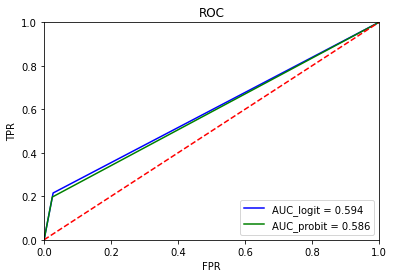

In [26]:
print('-'*75)
print('LOGIT MODEL')
print('-'*75)
print(f'TP = {TP_logit}, FP = {FP_logit}')
print(f'FN = {FN_logit}, TN = {TN_logit}', '\n')
print(f'Precision = {precision_logit}, Recall = {recall_logit}')
print(f'F1_score = {f1_logit}', '\n')
print('-'*75)
print('PROBIT MODEL')
print('-'*75)
print(f'TP = {TP_probit}, FP = {FP_probit}')
print(f'FN = {FN_probit}, TN = {TN_probit}', '\n')
print(f'Precision = {precision_probit}, Recall = {recall_probit}')
print(f'F1_score = {f1_probit}', '\n')

fpr_logit, tpr_logit, threshold = roc_curve(y, y_pred_logit)
roc_auc_logit = auc(fpr_logit, tpr_logit)
fpr_probit, tpr_probit, threshold = roc_curve(y, y_pred_probit)
roc_auc_probit = auc(fpr_probit, tpr_probit)
plt.title('ROC')
plt.plot(fpr_logit, tpr_logit, 'b', label = 'AUC_logit = %0.3f' % roc_auc_logit)
plt.plot(fpr_probit, tpr_probit, 'g', label = 'AUC_probit = %0.3f' % roc_auc_probit)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

Logit имеет больший precision, f1-score, а также большую площадь под ROC кривой. Следовательно, logit модель в данном случае показывает себя лучше, чем probit модель. Но вообще, модели очень плохо показали себя на roc-auc, может быть выборка несбалансированная. (Далее мы проверим это предположение на кросс-валидации)

In [27]:
logit_mod.get_margeff(at = 'mean').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                  Churn
Method:                          dydx
At:                              mean
==========================================================================================
                            dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
International plan         0.1679      0.013     13.112      0.000       0.143       0.193
Total day charge           0.0063      0.001     12.489      0.000       0.005       0.007
Total eve charge           0.0069      0.001      6.385      0.000       0.005       0.009
Total intl charge          0.0266      0.006      4.325      0.000       0.015       0.039
Customer service calls     0.0422      0.003     13.160      0.000       0.036       0.048
Total intl calls          -0.0075      0.002     -3.692      0.000      -0.012      -0.004
Total night minutes        0.0003   9.06e-05      3.327      0.001       0.000       0.000
Voice mail plan           -0.0772      0.012     -6.661      0.000      -0.100      -0.054
==========================================================================================
"""

Самый значительный вклад в отток дает International plan - нужно его как-то изменять, а вот voice mail plan как раз судя по оценкам дает вклад в уменьшение оттока.

Переходим к предсказаниям. Попробуем RFECV

In [28]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
import warnings

In [29]:
X_exp = df.drop('Churn', axis=1)

In [30]:
warnings.filterwarnings('ignore')

clf = LogisticRegression()
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=1,
    n_jobs=2,
)
rfecv.fit(X_exp, y)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 8


Я подобрал как раз 8 фичей.

Разобьем выборку на train и test

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Применим GridSearchCV.

In [43]:
from sklearn.model_selection import GridSearchCV

In [56]:
gscv = GridSearchCV(
    estimator=clf,
    scoring='roc_auc',
    param_grid={'penalty': ('l1', 'l2'), 'solver': ('liblinear', 'lbfgs')},
    cv=cv,
    n_jobs=2
) 

In [57]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=2,
             param_grid={'penalty': ('l1', 'l2'),
                         'solver': ('liblinear', 'lbfgs')},
             scoring='roc_auc')

In [58]:
gscv.cv_results_

{'mean_fit_time': array([0.01060286, 0.00079994, 0.00420089, 0.02720599]),
 'std_fit_time': array([0.0010205 , 0.00039997, 0.00040021, 0.00132701]),
 'mean_score_time': array([0.00140061, 0.        , 0.00120039, 0.00140038]),
 'std_score_time': array([0.00049064, 0.        , 0.00039997, 0.00048996]),
 'param_penalty': masked_array(data=['l1', 'l1', 'l2', 'l2'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_solver': masked_array(data=['liblinear', 'lbfgs', 'liblinear', 'lbfgs'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'penalty': 'l1', 'solver': 'liblinear'},
  {'penalty': 'l1', 'solver': 'lbfgs'},
  {'penalty': 'l2', 'solver': 'liblinear'},
  {'penalty': 'l2', 'solver': 'lbfgs'}],
 'split0_test_score': array([0.80789368,        nan, 0.79975836, 0.7929118 ]),
 'split1_test_score': array([0.84454289,        nan, 0.83721305, 0.82803061]),
 'split2_test_sc

In [59]:
x = np.arange(5)
l1 = [gscv.cv_results_[f'split{i}_test_score'][0] for i in x]
l2 = [gscv.cv_results_[f'split{i}_test_score'][2] for i in x]

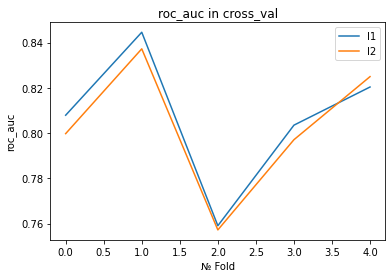

In [60]:
plt.title('roc_auc in cross_val')
plt.plot(x, l1, label='l1')
plt.plot(x, l2, label='l2')
plt.xlabel('№ Fold')
plt.ylabel('roc_auc')
plt.legend(loc='best')
plt.show()

Ну видно конечно, что l1 показывает себя получше.

Мы вверху предполагали, что у нас выборка несбалансированная и страдает recall. Давайте сравним на кросс-валидации.

In [62]:
gscv = GridSearchCV(
    estimator=clf,
    scoring='recall',
    param_grid={'penalty': ('l1', 'l2'), 'solver': ('liblinear', 'lbfgs'), 'class_weight': ('balanced', None)},
    cv=cv,
    n_jobs=2
) 

In [63]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=2,
             param_grid={'class_weight': ('balanced', None),
                         'penalty': ('l1', 'l2'),
                         'solver': ('liblinear', 'lbfgs')},
             scoring='recall')

In [64]:
gscv.cv_results_

{'mean_fit_time': array([0.01480336, 0.00040007, 0.00420113, 0.02760639, 0.00900168,
        0.00020003, 0.00460072, 0.02740617]),
 'std_fit_time': array([0.00074774, 0.00048998, 0.00039985, 0.0008002 , 0.00063249,
        0.00040007, 0.00049004, 0.00101999]),
 'mean_score_time': array([0.00160012, 0.        , 0.00100007, 0.0018002 , 0.00120058,
        0.        , 0.00140085, 0.0012002 ]),
 'std_score_time': array([4.89667804e-04, 0.00000000e+00, 2.43140197e-07, 4.00972551e-04,
        4.00233336e-04, 0.00000000e+00, 4.89571118e-04, 4.00066461e-04]),
 'param_class_weight': masked_array(data=['balanced', 'balanced', 'balanced', 'balanced', None,
                    None, None, None],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l1', 'l2', 'l2', 'l1', 'l1', 'l2', 'l2'],
              mask=[False, False, False, False, False, False, False, False],
        fill_va

recall при балансировке намного выше, наша гипотеза действительно подтвердилась!

# №3 (60 баллов)

- Ладно, пришла пора для чего более сложного
- В этой задаче вы сами все решаете. Более того, у вас будут даже чужие ноутбуки
- Если вы проведете такой же анализ, что и выше, то балл за это задание будет равен 10/40
- Чтобы получить максимальный балл за это задание, то вам нужно будет провести полноценное исследование

- Итак, представьте себе следующую ситуацию
- Вы участвуете в создании продукта/модели по предсказанию инсульта 
- Вы - главный аналитик, который отвечает за создание модели и презентацию ее результатов
- Проблема в том, что вы единственный аналитик в команде. Все остальные члены команды **не имеют математического бэкграунда, они не знают никаких моделей, они никогда не занимались программированием**. Они все медики.
- Вы знаете, что для тестривания модели на первом этапе подойдет [этот](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) замечательный датасет. Там есть примеры различного анализа и моделей
- Но вы не можете просто взять примеры оттуда:
    - Во-первых, ваша модель должна быть логистической или пробит 
    - Во-вторых, посмотрите на то, как меняется вероятность инсульта в зависимости от характеристик пациента
    - В-третьих, подумайте над тем, как можно поменять/улучшить эту модель, чтобы обеспечить **наилучшее предсказание**. Подумайте, какую метрику вы будете использовать для этой задачи. Обоснуйте выбор метрики.
- Еще важный момент. Вы отправите, получившееся исследование команде, поэтому оно не должно быть большим (время на прочтение и понимание того, что происходит, не должно занимать более 10-15 минут). Помните, что у команды есть и другие задачи, поэтому позаботьтесь, чтобы исследование было:
    - Структурированным. Можете использовать [классический](https://blogs.lse.ac.uk/impactofsocialsciences/2018/05/21/writing-a-page-turner-how-to-tell-a-story-in-your-scientific-paper/) подход к научному исследованию и добавить то, как делают [консультанты](https://strategyu.co/mckinsey-structured-problem-solving-secrets/)
    - Отвечало на поставленную задачу
    - Было самодостаточным (в одном jupyter файле, проще говоря)
    - Воспроизводимым (увижу, что явно не прописываете `seed`, если/где надо, поставлю 0 за это задание)
    - Было не стыдно показать другим людям (если графики будут без подписей осей и названия, как минимум, поставлю 0)

In [93]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [94]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [95]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [96]:
cols_cat = []
for col in df.columns:
    if df[col].dtype == 'O':
        cols_cat.append(col)
        print(f'{col} : {set(df[col].values)}')    

gender : {'Other', 'Male', 'Female'}
ever_married : {'Yes', 'No'}
work_type : {'Never_worked', 'children', 'Private', 'Self-employed', 'Govt_job'}
Residence_type : {'Urban', 'Rural'}
smoking_status : {'never smoked', 'Unknown', 'smokes', 'formerly smoked'}


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Закодируем категориальные признаки

In [98]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in cols_cat:
    df[col] = labelencoder.fit_transform(df[col])

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'ever_married'}>],
       [<Axes: title={'center': 'work_type'}>,
        <Axes: title={'center': 'Residence_type'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'smoking_status'}>,
        <Axes: title={'center': 'stroke'}>]], dtype=object)

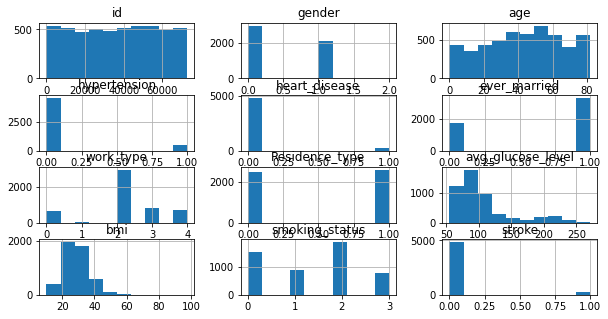

In [99]:
df.hist(figsize = (10,5))

Судя по гистограмме gender одного гендера категорически мало, проверим

In [82]:
for gender in df['gender'].unique():
    print(f'{gender}: {sum(df["gender"].values == gender)}')

1: 2115
0: 2994
2: 1


In [151]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

for gender in df['gender'].unique():
    print(f'{gender}: {sum(df["gender"].values == gender)}')

Male: 2115
Female: 2994
Other: 1


Действительно, трансгендер нам в выборке не особо нужен - это можно счесть за выброс, поэтому мы его просто дропнем.

Также можно увидеть, что у фичи bmi есть пропуски, мы их пока что тоже дропнем, потом если score будет не удовлетворительный, заменим значение на среднее (но я думаю - это не лучший способ, так как признак bmi не сбалансирован)

Также конечно, мы уберем id - он нам ни к чему

In [152]:
df = df.drop('id', axis=1)
df = df.dropna()
df = df[df['gender'] != 'Other']

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.1+ KB


Разделим категориальные колонки и численные

In [154]:
num_cols = ['age','avg_glucose_level','bmi']
obj_cols = list(set(df.columns.tolist()) - set(num_cols))

In [155]:
obj_cols

['smoking_status',
 'hypertension',
 'gender',
 'ever_married',
 'work_type',
 'heart_disease',
 'Residence_type',
 'stroke']

In [156]:
from sklearn.preprocessing import MinMaxScaler

Возраст переведем в инты, мы будем его модифицировать MinMaxScaler. 

In [157]:
df['age'] = (df['age'] + 1).astype(int)

In [158]:
scaler = MinMaxScaler()
df[num_cols[:-1]] = scaler.fit_transform(df[num_cols[:-1]])

In [161]:
for col in obj_cols:
    df[col] = labelencoder.fit_transform(df[col])

Наплодим признаков с помощью one hot encoding

In [162]:
for col in obj_cols:
    df[col] = df[col].astype(str)
    
train = df.drop('stroke',axis = 1)

train = pd.get_dummies(train)

train['stroke'] = df['stroke'].astype(int)

df = train.copy()

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4908 non-null   float64
 1   avg_glucose_level  4908 non-null   float64
 2   bmi                4908 non-null   float64
 3   gender_0           4908 non-null   uint8  
 4   gender_1           4908 non-null   uint8  
 5   hypertension_0     4908 non-null   uint8  
 6   hypertension_1     4908 non-null   uint8  
 7   heart_disease_0    4908 non-null   uint8  
 8   heart_disease_1    4908 non-null   uint8  
 9   ever_married_0     4908 non-null   uint8  
 10  ever_married_1     4908 non-null   uint8  
 11  work_type_0        4908 non-null   uint8  
 12  work_type_1        4908 non-null   uint8  
 13  work_type_2        4908 non-null   uint8  
 14  work_type_3        4908 non-null   uint8  
 15  work_type_4        4908 non-null   uint8  
 16  Residence_type_0   4908 

Разбиваем на train и test

In [170]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('stroke',axis = 1), df['stroke'], test_size = 0.2, stratify=df['stroke'])

Переходим к модели логистической регрессии

Пока просто посмотрим, потом кросс-валидацию прогоним

In [192]:
logist = LogisticRegression(random_state=42)
logist.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [193]:
probs = logist.predict_proba(x_test)

In [194]:
fpr, tpr, thr = roc_curve(y_test, probs[:, 1])
roc_auc = round(auc(fpr, tpr), 2)

Text(0.5, 1.0, 'ROC')

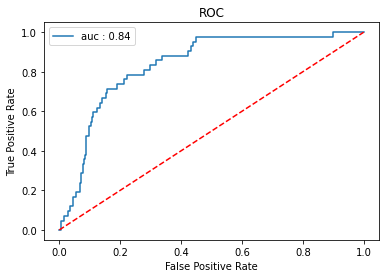

In [195]:
plt.plot(fpr,tpr,label = f'auc : {roc_auc}')
plt.plot([0,1],[0,1], 'r--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

Мы все же хотим смотреть за recall, чтобы в больших случаях выявлять инсульт. 

Заведем кросс-валидацию

In [196]:
gscv = GridSearchCV(
    estimator=clf,
    scoring='recall',
    param_grid={'penalty': ('l1', 'l2', None, 'elacticnet'),
                'solver': ('liblinear', 'lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga'), 
                'class_weight': ('balanced', None)},
    cv=cv,
    n_jobs=2
) 

In [197]:
gscv.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=2,
             param_grid={'class_weight': ('balanced', None),
                         'penalty': ('l1', 'l2', None, 'elacticnet'),
                         'solver': ('liblinear', 'lbfgs', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga')},
             scoring='recall')

In [198]:
gscv.cv_results_

{'mean_fit_time': array([0.07781768, 0.00040007, 0.00080009, 0.00060024, 0.00020013,
        0.0806191 , 0.00640149, 0.03500762, 0.03160744, 0.00060015,
        0.05561252, 0.06301417, 0.0006001 , 0.00100026, 0.00040035,
        0.0006001 , 0.        , 0.0006    , 0.00060015, 0.00080013,
        0.0006001 , 0.00040002, 0.00080018, 0.0006001 , 0.03660812,
        0.00060019, 0.00080013, 0.00080023, 0.00060005, 0.07201653,
        0.00680156, 0.03320737, 0.04681025, 0.00019999, 0.05601258,
        0.0616138 , 0.0006001 , 0.00100021, 0.00060015, 0.00060005,
        0.00060015, 0.00059996, 0.00060019, 0.00080032, 0.0006001 ,
        0.00060015, 0.00079999, 0.00060005]),
 'std_fit_time': array([4.70869820e-03, 4.89979242e-04, 4.00042601e-04, 4.90096135e-04,
        4.00257111e-04, 8.59506236e-03, 4.90115523e-04, 1.09553987e-03,
        4.67498568e-03, 4.90018230e-04, 1.02018825e-03, 6.32636080e-04,
        4.89979265e-04, 7.77697870e-07, 4.90329737e-04, 4.89979242e-04,
        0.00000000e+0

Итого, по результатам кросс-валидации, самые оптимальные параметры:

- 'class_weight': 'balanced'
- 'penalty': 'l2'
- 'solver': 'liblinear' or 'lbfgs' or 'newton-cg'
